## 数据集介绍：

这个数据集涉及到美国的污染问题。美国环境保护署详细记录了美国的污染情况，但下载所有的数据并按照数据科学家感兴趣的格式进行安排是一件痛苦的事情。 因此，我从2000年至2016年每天收集四种主要污染物（二氧化氮，二氧化硫，一氧化碳和臭氧），并将它们整齐地放置在一个csv文件中。

In [1]:
import pandas as pd
df=pd.read_csv('/pi/ai/kaggle/pollution_us_2000_2016.csv')
df.head()

,Unnamed: 0,State Code,County Code,Site Num,Address,State,County,City,Date Local,NO2 Units,...,SO2 Units,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Units,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,0,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,3.000000,9.0,21,13.0,Parts per million,1.145833,4.2,21,NaN
1,1,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,3.000000,9.0,21,13.0,Parts per million,0.878947,2.2,23,25.0
2,2,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,2.975000,6.6,23,NaN,Parts per million,1.145833,4.2,21,NaN
3,3,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,2.975000,6.6,23,NaN,Parts per million,0.878947,2.2,23,25.0
4,4,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-02,Parts per billion,...,Parts per billion,1.958333,3.0,22,4.0,Parts per million,0.850000,1.6,23,NaN


In [2]:
# 先去除掉无意义的字段（列）：
del df['Unnamed: 0']
df.head()

,State Code,County Code,Site Num,Address,State,County,City,Date Local,NO2 Units,NO2 Mean,...,SO2 Units,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Units,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,19.041667,...,Parts per billion,3.000000,9.0,21,13.0,Parts per million,1.145833,4.2,21,NaN
1,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,19.041667,...,Parts per billion,3.000000,9.0,21,13.0,Parts per million,0.878947,2.2,23,25.0
2,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,19.041667,...,Parts per billion,2.975000,6.6,23,NaN,Parts per million,1.145833,4.2,21,NaN
3,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,19.041667,...,Parts per billion,2.975000,6.6,23,NaN,Parts per million,0.878947,2.2,23,25.0
4,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-02,Parts per billion,22.958333,...,Parts per billion,1.958333,3.0,22,4.0,Parts per million,0.850000,1.6,23,NaN


In [4]:
# 各字段信息：
df.info()
# 数值型的值很多

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1746661 entries, 0 to 1746660
Data columns (total 28 columns):
State Code           int64
County Code          int64
Site Num             int64
Address              object
State                object
County               object
City                 object
Date Local           object
NO2 Units            object
NO2 Mean             float64
NO2 1st Max Value    float64
NO2 1st Max Hour     int64
NO2 AQI              int64
O3 Units             object
O3 Mean              float64
O3 1st Max Value     float64
O3 1st Max Hour      int64
O3 AQI               int64
SO2 Units            object
SO2 Mean             float64
SO2 1st Max Value    float64
SO2 1st Max Hour     int64
SO2 AQI              float64
CO Units             object
CO Mean              float64
CO 1st Max Value     float64
CO 1st Max Hour      int64
CO AQI               float64
dtypes: float64(10), int64(9), object(9)
memory usage: 373.1+ MB


总共有28个字段：

     州代码：由美国环保局分配给每个州的代码

     县代码：由美国环保署分配的特定州的代码

     地点编号：由美国环保局分配的特定县的地点编号

     地址：监测站点的地址

     状态：监测点的状态

     县：县监测站点

     城市：监测点的城市

     日期本地：监视日期

     四种污染物（NO2，O3，SO2和O3）各有5个专栏。 例如，对于NO2：

     NO2单位：测量NO2的单位

     NO2平均值：给定日内NO2浓度的算术平均值

     NO2 AQI：一天内NO2计算的空气质量指数

     NO2第一最大值：给定日期的NO2浓度的最大值

     NO2第1小时：指在某一天记录的最大NO2浓度的小时数



观察总数超过140万。
对于这么大一个数据集分析是比较困难的，而且是随时间变化的

In [5]:
# 每四个是重复的数据，看后面的字段部分：
# 发现有缺失值，并且有少量字段数据是不一样的
# 在kaggle的讨论区找到了答案，建议使用平均值
df.isnull().any()

State Code           False
County Code          False
Site Num             False
Address              False
State                False
County               False
City                 False
Date Local           False
NO2 Units            False
NO2 Mean             False
NO2 1st Max Value    False
NO2 1st Max Hour     False
NO2 AQI              False
O3 Units             False
O3 Mean              False
O3 1st Max Value     False
O3 1st Max Hour      False
O3 AQI               False
SO2 Units            False
SO2 Mean             False
SO2 1st Max Value    False
SO2 1st Max Hour     False
SO2 AQI               True
CO Units             False
CO Mean              False
CO 1st Max Value     False
CO 1st Max Hour      False
CO AQI                True
dtype: bool

In [6]:
# 经过观察，发现每四个相似数据只有一个是没有缺失值的
# 为了方便分析，去除有缺失值的记录（行）
df=df.dropna()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 436876 entries, 1 to 1746658
Data columns (total 28 columns):
State Code           436876 non-null int64
County Code          436876 non-null int64
Site Num             436876 non-null int64
Address              436876 non-null object
State                436876 non-null object
County               436876 non-null object
City                 436876 non-null object
Date Local           436876 non-null object
NO2 Units            436876 non-null object
NO2 Mean             436876 non-null float64
NO2 1st Max Value    436876 non-null float64
NO2 1st Max Hour     436876 non-null int64
NO2 AQI              436876 non-null int64
O3 Units             436876 non-null object
O3 Mean              436876 non-null float64
O3 1st Max Value     436876 non-null float64
O3 1st Max Hour      436876 non-null int64
O3 AQI               436876 non-null int64
SO2 Units            436876 non-null object
SO2 Mean             436876 non-null float64
SO2 1st Ma

In [8]:
# 此时已经没有缺失值了
# 我们把剩下的新数据写入新的csv文件，然后打开文件：
df.to_csv('./out/pollution_new.csv')

In [9]:
df=pd.read_csv('./out/pollution_new.csv')
df.head()

,Unnamed: 0,State Code,County Code,Site Num,Address,State,County,City,Date Local,NO2 Units,...,SO2 Units,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Units,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,1,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,3.000000,9.0,21,13.0,Parts per million,0.878947,2.2,23,25.0
1,5,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-02,Parts per billion,...,Parts per billion,1.958333,3.0,22,4.0,Parts per million,1.066667,2.3,0,26.0
2,9,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-03,Parts per billion,...,Parts per billion,5.250000,11.0,19,16.0,Parts per million,1.762500,2.5,8,28.0
3,13,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-04,Parts per billion,...,Parts per billion,7.083333,16.0,8,23.0,Parts per million,1.829167,3.0,23,34.0
4,17,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-05,Parts per billion,...,Parts per billion,8.708333,15.0,7,21.0,Parts per million,2.700000,3.7,2,42.0


In [10]:
del df['Unnamed: 0']

In [11]:
# 筛选出皇后区的数据：
df[df['County']=='Queens']

,State Code,County Code,Site Num,Address,State,County,City,Date Local,NO2 Units,NO2 Mean,...,SO2 Units,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Units,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
16079,36,81,97,56TH AVE AT SPRINGFIELD BLVD,New York,Queens,New York,2000-01-01,Parts per billion,28.041667,...,Parts per billion,16.541667,26.0,21,37.0,Parts per million,0.652632,1.1,23,13.0
16080,36,81,97,56TH AVE AT SPRINGFIELD BLVD,New York,Queens,New York,2000-01-02,Parts per billion,35.375000,...,Parts per billion,13.791667,29.0,2,41.0,Parts per million,0.833333,1.6,2,18.0
16081,36,81,97,56TH AVE AT SPRINGFIELD BLVD,New York,Queens,New York,2000-01-03,Parts per billion,32.875000,...,Parts per billion,9.958333,19.0,6,27.0,Parts per million,0.383333,0.7,19,8.0
16082,36,81,97,56TH AVE AT SPRINGFIELD BLVD,New York,Queens,New York,2000-01-04,Parts per billion,22.125000,...,Parts per billion,3.541667,12.0,22,17.0,Parts per million,0.150000,0.5,0,6.0
16083,36,81,97,56TH AVE AT SPRINGFIELD BLVD,New York,Queens,New York,2000-01-05,Parts per billion,15.958333,...,Parts per billion,3.291667,5.0,19,7.0,Parts per million,0.050000,0.2,0,2.0
16084,36,81,97,56TH AVE AT SPRINGFIELD BLVD,New York,Queens,New York,2000-01-06,Parts per billion,31.125000,...,Parts per billion,6.666667,14.0,7,20.0,Parts per million,0.170833,0.4,23,5.0
16085,36,81,97,56TH AVE AT SPRINGFIELD BLVD,New York,Queens,New York,2000-01-07,Parts per billion,34.458333,...,Parts per billion,13.416667,27.0,7,39.0,Parts per million,0.475000,0.9,9,10.0
16086,36,81,97,56TH AVE AT SPRINGFIELD BLVD,New York,Queens,New York,2000-01-08,Parts per billion,25.500000,...,Parts per billion,9.875000,22.0,23,31.0,Parts per million,0.222222,0.6,21,7.0
16087,36,81,97,56TH AVE AT SPRINGFIELD BLVD,New York,Queens,New York,2000-01-09,Parts per billion,33.375000,...,Parts per billion,14.541667,22.0,9,31.0,Parts per million,0.516667,0.7,22,8.0
16088,36,81,97,56TH AVE AT SPRINGFIELD BLVD,New York,Queens,New York,2000-01-10,Parts per billion,28.250000,...,Parts per billion,6.458333,13.0,1,19.0,Parts per million,0.358333,0.7,0,8.0


In [13]:
# 将日期转换成pandas中的时间格式：
%pylab inline

from datetime import datetime
df['Date Local']=pd.to_datetime(df['Date Local'])

Populating the interactive namespace from numpy and matplotlib


In [14]:
type(df['Date Local'])

pandas.core.series.Series

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436876 entries, 0 to 436875
Data columns (total 28 columns):
State Code           436876 non-null int64
County Code          436876 non-null int64
Site Num             436876 non-null int64
Address              436876 non-null object
State                436876 non-null object
County               436876 non-null object
City                 436876 non-null object
Date Local           436876 non-null datetime64[ns]
NO2 Units            436876 non-null object
NO2 Mean             436876 non-null float64
NO2 1st Max Value    436876 non-null float64
NO2 1st Max Hour     436876 non-null int64
NO2 AQI              436876 non-null int64
O3 Units             436876 non-null object
O3 Mean              436876 non-null float64
O3 1st Max Value     436876 non-null float64
O3 1st Max Hour      436876 non-null int64
O3 AQI               436876 non-null int64
SO2 Units            436876 non-null object
SO2 Mean             436876 non-null float64
SO2

In [16]:
# 皇后区2000年每个月二氧化氮的平均值：
df_Queens=df[df['County']=='Queens']
df_Queens_2000=df_Queens[df_Queens['Date Local'].dt.year==2000]
df_Queens_2000['NO2 Mean'].groupby(df_Queens_2000['Date Local'].dt.month).mean()

Date Local
1     26.125948
2     31.132626
3     27.974982
4     22.449245
5     25.126116
6     24.926126
7     22.789881
8     23.449218
9     23.094957
10    29.664284
11    24.721150
12    27.156692
Name: NO2 Mean, dtype: float64

绘制出二氧化氮的平均值变化曲线

再将其他三种污染物的变化图画出：

发现二氧化氮和一氧化碳的波动比较大，臭氧和二氧化硫有类似负相关的关系

接下来我们看一下2000年-2016年皇后区的四项污染物的年平均值

通过观察，发现除了臭氧，其他三种空气污染物随着时间变化，总体呈现下降趋势！



## AQI空气质量指数
发现AQI分为六级，值越大，空气质量越差：

计算时按照如下方式：

各种污染物的AQI值分别算出来后，取数值最大的那个即为最终报告的AQI值。比如SO2浓度为20.5μg/m3，算出来对应的 AQI为29；PM10浓度为150.8μg/m3，对应的AQI为98；PM2.5浓度为130.7μg/m3，对应的AQI为190。最终报告的 AQI值就是190，而贡献了那个最大值的PM2.5则称为首要污染物。

In [17]:
# 取出2000-2016每天皇后区的AQI值：
df_Queens['AQI']=df_Queens[['NO2 AQI', 'O3 AQI', 'SO2 AQI', 'CO AQI']].apply(lambda x:max(x), axis=1)

/Users/xiaofeiwu/miniconda3/envs/bigdata/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [18]:
df_Queens['AQI'].head()

16079    37.0
16080    42.0
16081    39.0
16082    39.0
16083    22.0
Name: AQI, dtype: float64

In [19]:
# 数据的分布情况：
df_Queens['AQI'].describe()

count    6047.000000
mean       41.809162
std        17.105014
min        12.000000
25%        31.000000
50%        39.000000
75%        47.000000
max       201.000000
Name: AQI, dtype: float64

按照每年365天算，2000-2016年有17年，共有6205天，现在的数据有6047条

因为2016年数据并不是到年底的

通过查看数据，发现只是到四月底的：

In [20]:
df_Queens.tail()

,State Code,County Code,Site Num,Address,State,County,City,Date Local,NO2 Units,NO2 Mean,...,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Units,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI,AQI
434837,36,81,124,Queens College 65-30 Kissena Blvd Parking L...,New York,Queens,New York,2016-04-26,Parts per billion,11.462500,...,0.012500,0.1,2,0.0,Parts per million,0.200000,0.2,0,2.0,31.0
434838,36,81,124,Queens College 65-30 Kissena Blvd Parking L...,New York,Queens,New York,2016-04-27,Parts per billion,13.480000,...,0.157143,0.4,16,0.0,Parts per million,0.208333,0.3,22,3.0,28.0
434839,36,81,124,Queens College 65-30 Kissena Blvd Parking L...,New York,Queens,New York,2016-04-28,Parts per billion,11.989474,...,0.287500,0.7,19,0.0,Parts per million,0.229167,0.3,0,3.0,40.0
434840,36,81,124,Queens College 65-30 Kissena Blvd Parking L...,New York,Queens,New York,2016-04-29,Parts per billion,9.041667,...,0.170833,0.5,5,0.0,Parts per million,0.187500,0.2,0,2.0,42.0
434841,36,81,124,Queens College 65-30 Kissena Blvd Parking L...,New York,Queens,New York,2016-04-30,Parts per billion,8.204167,...,0.245833,0.9,20,0.0,Parts per million,0.195833,0.2,0,2.0,43.0


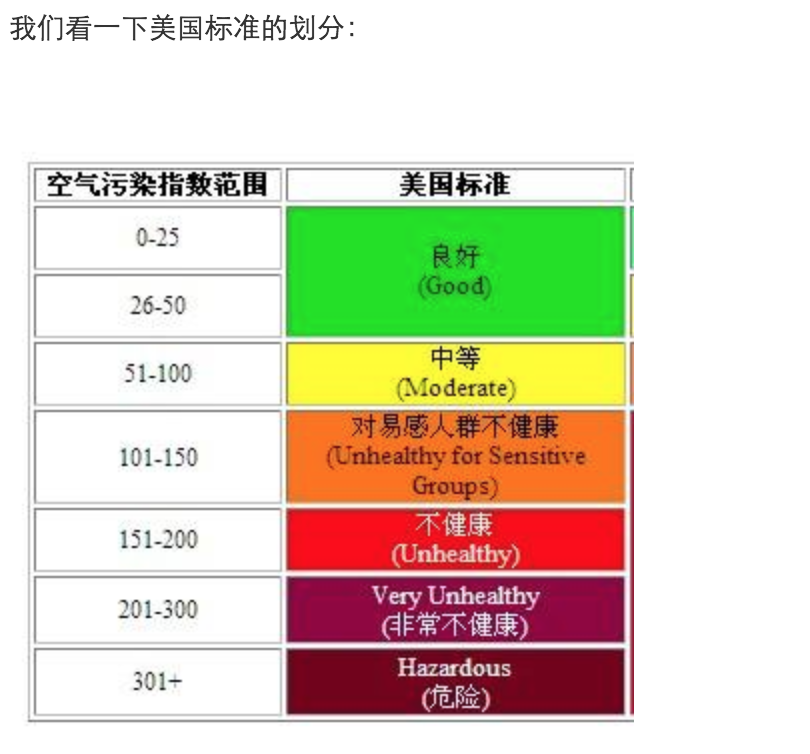

In [21]:
# 我们使用map函数对pandas的AQI列分等级（依照实际得分）
def AQI_level(e):
    if e<=50:
        return 'Good'
    elif e>50 and e<=100:
        return 'Moderate'
    elif e>100 and e<=150:
        return 'Unhealthy for Sensitive Groups'
    elif e>150 and e<=200:
        return 'Unhealthy'
    elif e>200 and e<=300:
        return 'Very Unhealthy'
    else:
        return 'Hazardous'

AQI_level(144)

'Unhealthy for Sensitive Groups'

In [22]:
df_Queens['AQI_level']=df_Queens['AQI'].map(AQI_level)

/Users/xiaofeiwu/miniconda3/envs/bigdata/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [23]:
df_Queens['AQI_level'].head()

16079    Good
16080    Good
16081    Good
16082    Good
16083    Good
Name: AQI_level, dtype: object

In [24]:
# 我们对空气质量统计一下：
df_Queens['AQI_level'].value_counts()

Good                              4948
Moderate                           998
Unhealthy for Sensitive Groups      91
Unhealthy                            9
Very Unhealthy                       1
Name: AQI_level, dtype: int64

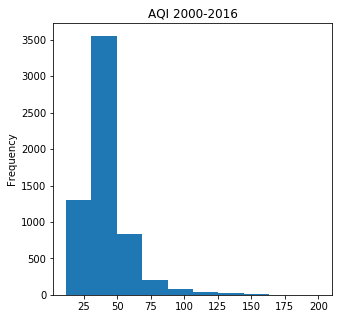

In [25]:
df_Queens['AQI'].plot(kind='hist', 
                     figsize=[5,5],
                     legend=False,
                     title='AQI 2000-2016')

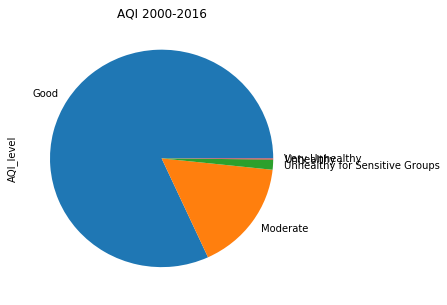

In [26]:
# 发现空气质量GOOD占比很大
# 为了看出比重，我们做个饼图：
df_Queens['AQI_level'].value_counts().plot(kind='pie',
                                          figsize=[5,5],
                                          counterclock=True,
                                          startangle=0,
                                          legend=False,
                                          title='AQI 2000-2016')

发现占比超过3/4



通过此次分析，大体可以看出：

1.纽约皇后区总体空气质量越来越好（时间序列）

2.从总体上看，空气质量良好占比非常大。